In [1]:
cd ..

/Users/crupley/gal/hoodie


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from time import time

In [3]:
plt.rcParams['figure.figsize'] = 16, 10

In [4]:
from code.makedbs import *

In [5]:
ws = get_db('walkscore').sort_values(by = ['snapped_lon', 'snapped_lat'])
print ws.shape
ws.head()

(5032, 7)


,snapped_lat,snapped_lon,walkscore,description,updated,searched_lat,searched_lon
0,37.7190,-122.5185,1,Car-Dependent,2013-08-10 17:19:49.723670,37.719347,-122.518079
1,37.7205,-122.5185,0,Car-Dependent,2015-06-16 02:11:34.261700,37.720717,-122.518079
2,37.7220,-122.5185,2,Car-Dependent,2013-08-10 17:20:27.329400,37.722088,-122.518079
3,37.7235,-122.5185,0,Car-Dependent,2014-09-05 10:53:05.520620,37.723458,-122.518079
4,37.7250,-122.5185,0,Car-Dependent,2015-06-16 02:11:33.920510,37.724829,-122.518079


In [6]:
x = ws.snapped_lon.unique()
y = ws.snapped_lat.unique()
X, Y = np.meshgrid(x, y)
print X.shape, Y.shape

(68, 74) (68, 74)


In [7]:
print len(x), len(y)

74 68


In [8]:
z = ws.walkscore.reshape(68, 74, order='F')

<matplotlib.colorbar.Colorbar instance at 0x10719f290>

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


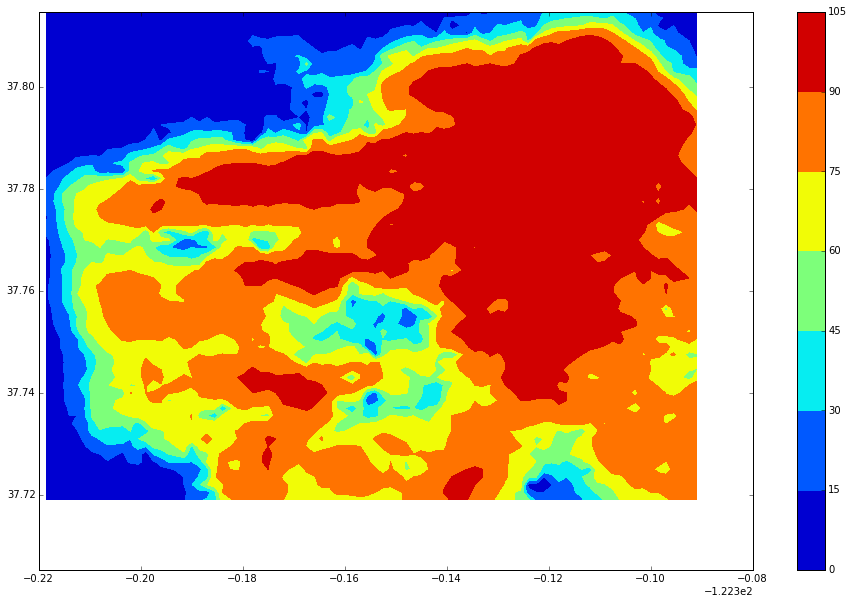

In [9]:
plt.contourf(x, y, z)
plt.axis('equal')
plt.colorbar()

In [10]:
print min(x), max(x), min(y), max(y)

-122.5185 -122.391 37.719 37.8195


# Population density

In [8]:
pop = get_db('usc_pop')
pop.head()

,block,block_group,tract,id2,total
0,101,1,1000,60750101001000,0
1,101,1,1001,60750101001001,44
2,101,1,1002,60750101001002,0
3,101,1,1003,60750101001003,0
4,101,1,1004,60750101001004,1


In [9]:
sf = get_db('usc_shapefile')
sf.head()

,state,county,tract,block,geoid,name,mtfcc,land_area,water_area,lat,lon
0,06,075,021300,2002,60750213002002,Block 2002,G5040,16958,0,37.750067,-122.441075
1,06,075,021300,2000,60750213002000,Block 2000,G5040,16823,0,37.750196,-122.438933
2,06,075,020500,3004,60750205003004,Block 3004,G5040,17020,0,37.756794,-122.436270
3,06,075,021200,1003,60750212001003,Block 1003,G5040,16415,0,37.753529,-122.437050
4,06,075,021100,4001,60750211004001,Block 4001,G5040,17523,0,37.755758,-122.433400


In [10]:
pdf = pop.merge(sf, left_on='id2', right_on='geoid').sort_values(by = ['lon', 'lat'])
pdf = pdf[pdf.lon > -122.5185]
pdf = pdf[pdf.lon < -122.35454]
# pdf = pdf[pdf.lat > 37.70784]
# pdf = pdf[pdf.lat < 37.8195]
pdf.head()

,block_x,block_group,tract_x,id2,total,state,county,tract_y,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon
6326,479.01,2,2002,60750479012002,0,06,075,047901,2002,60750479012002,Block 2002,G5040,22643,0,37.778446,-122.515866
7104,9803.00,1,1023,60759803001023,0,06,075,980300,1023,60759803001023,Block 1023,G5040,0,287384,37.767179,-122.514994
6324,479.01,2,2000,60750479012000,0,06,075,047901,2000,60750479012000,Block 2000,G5040,0,2563770,37.795001,-122.513993
6327,479.01,2,2003,60750479012003,0,06,075,047901,2003,60750479012003,Block 2003,G5040,256634,0,37.781286,-122.513657
5812,352.01,2,2004,60750352012004,0,06,075,035201,2004,60750352012004,Block 2004,G5040,0,630051,37.756112,-122.513469


In [11]:
pdf.shape

(7372, 16)

In [12]:
x = pdf.lon
y = pdf.lat
z = pdf.total

In [13]:
print min(x), max(x), min(y), max(y)

-122.5158655 -122.3586997 37.7081926 37.8505976


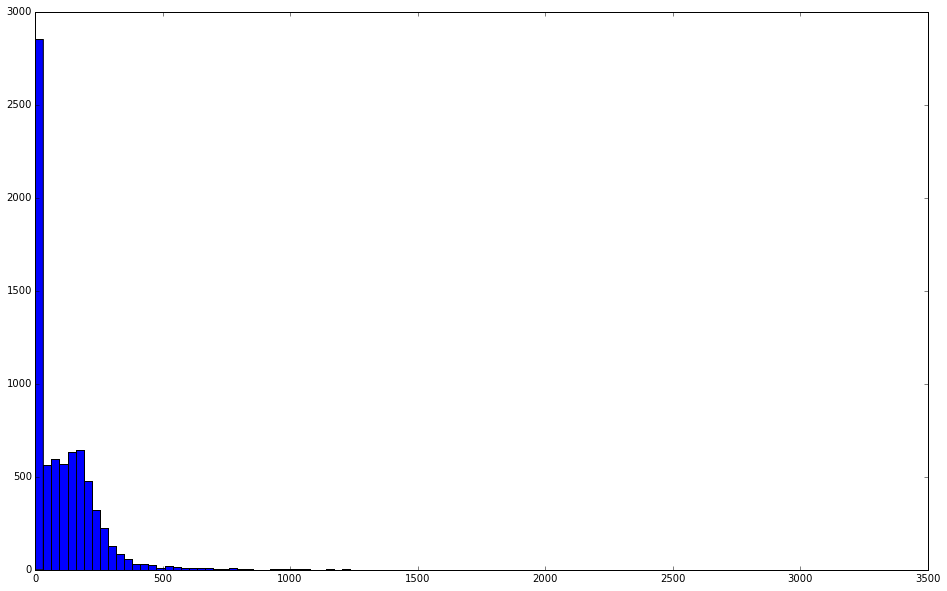

In [14]:
plt.hist(z, bins=100);

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


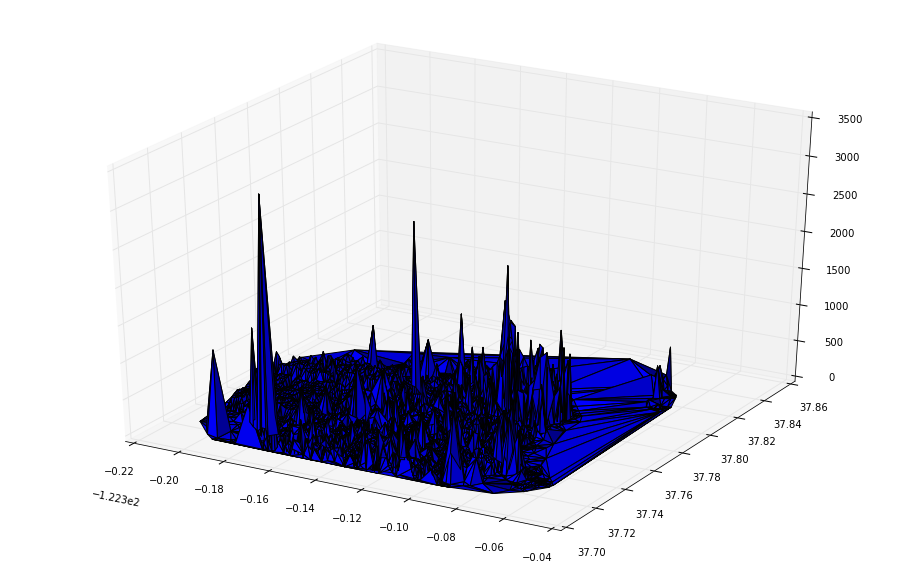

In [15]:
# http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z)

In [38]:
# http://stackoverflow.com/questions/9008370/python-2d-contour-plot-from-3-lists-x-y-and-rho

import scipy.interpolate

In [72]:
x = pdf.lon
y = pdf.lat
z = pdf.total

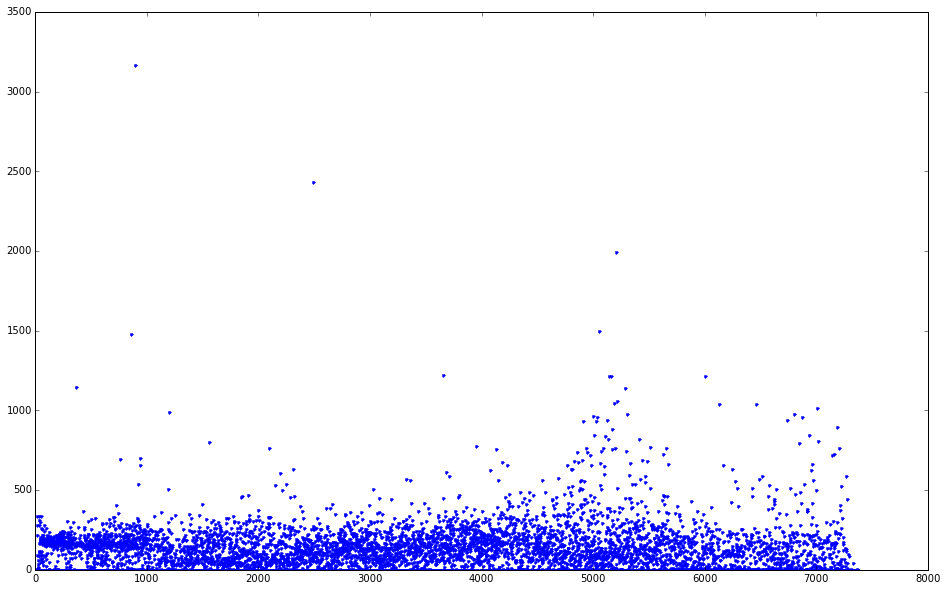

In [17]:
plt.plot(z, '.')

In [73]:
# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

In [84]:
# Interpolate
start_time = time()
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)
end_time = time()
print end_time - start_time

27.2864170074


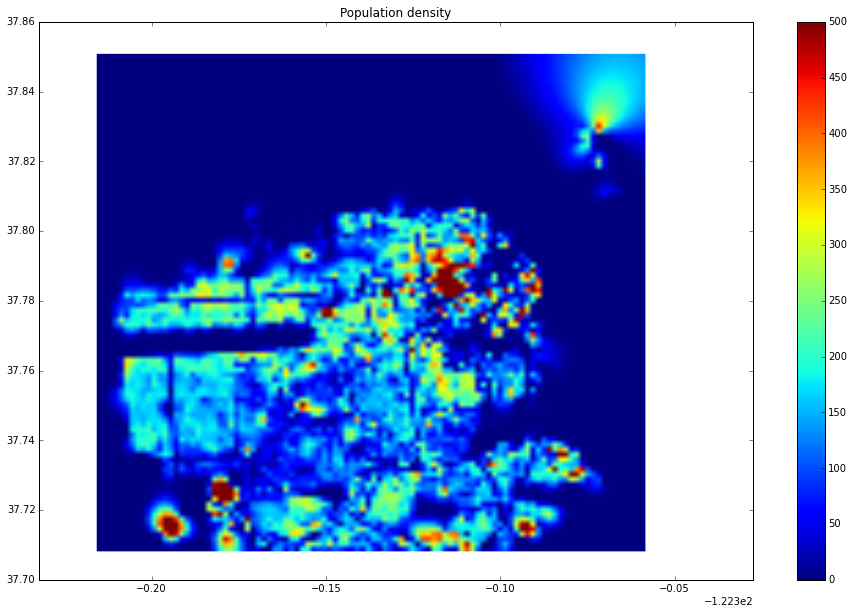

In [85]:
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.scatter(x, y, c=z)
plt.clim(0, 500)
plt.axis('equal')
plt.colorbar()
plt.title('Population density')
plt.show()

In [35]:
print z.sum(), zi.sum()

805235 595581.026733


In [36]:
def make_bins(x, y, z):
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
    zi = rbf(xi, yi)
    
    return xi, yi, zi
    

# Household size

In [39]:
hdf = get_db('usc_household')
hdf = hdf.merge(sf, left_on='id2', right_on='geoid')

hdf = hdf[hdf.lon > -122.5185]
hdf = hdf[hdf.lon < -122.35454]
print hdf.shape
hdf.head()

(7372, 23)


,block_x,block_group,tract_x,id2,total,p1,p2,p3,p4,p5,...,county,tract_y,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,075,010100,1000,60750101001000,Block 1000,G5040,0,646925,37.809475,-122.409779
1,101,1,1001,60750101001001,30,22,6,2,0,0,...,075,010100,1001,60750101001001,Block 1001,G5040,243533,0,37.808522,-122.409559
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,075,010100,1002,60750101001002,Block 1002,G5040,3062,0,37.806984,-122.406458
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,075,010100,1003,60750101001003,Block 1003,G5040,1323,0,37.807758,-122.408149
4,101,1,1004,60750101001004,0,0,0,0,0,0,...,075,010100,1004,60750101001004,Block 1004,G5040,15453,0,37.808645,-122.414515


In [40]:
hdf.columns

Index([u'block_x', u'block_group', u'tract_x', u'id2', u'total', u'p1', u'p2',
       u'p3', u'p4', u'p5', u'p6', u'p7', u'state', u'county', u'tract_y',
       u'block_y', u'geoid', u'name', u'mtfcc', u'land_area', u'water_area',
       u'lat', u'lon'],
      dtype='object')

In [41]:
hdf['avg'] = (hdf.p1 + 2*hdf.p2 + 3*hdf.p3 + 4*hdf.p4 + 5*hdf.p5 + 6*hdf.p6 + 7*hdf.p7) / hdf.total

In [44]:
hdf.fillna(0, inplace=True)
hdf.head()

,block_x,block_group,tract_x,id2,total,p1,p2,p3,p4,p5,...,tract_y,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon,avg
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,010100,1000,60750101001000,Block 1000,G5040,0,646925,37.809475,-122.409779,0.000000
1,101,1,1001,60750101001001,30,22,6,2,0,0,...,010100,1001,60750101001001,Block 1001,G5040,243533,0,37.808522,-122.409559,1.333333
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,010100,1002,60750101001002,Block 1002,G5040,3062,0,37.806984,-122.406458,0.000000
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,010100,1003,60750101001003,Block 1003,G5040,1323,0,37.807758,-122.408149,0.000000
4,101,1,1004,60750101001004,0,0,0,0,0,0,...,010100,1004,60750101001004,Block 1004,G5040,15453,0,37.808645,-122.414515,0.000000


In [45]:
x = hdf.lon
y = hdf.lat
z = hdf.avg

In [46]:
xi, yi, zi = make_bins(x, y, z)

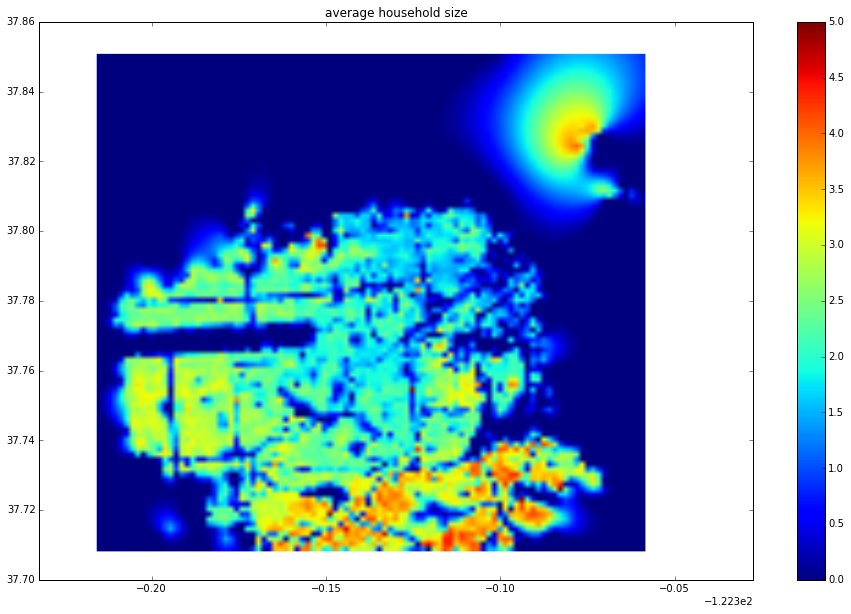

In [53]:
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.scatter(x, y, c=z)
plt.clim(0, 5)
plt.axis('equal')
plt.colorbar()
plt.title('average household size')
plt.show()

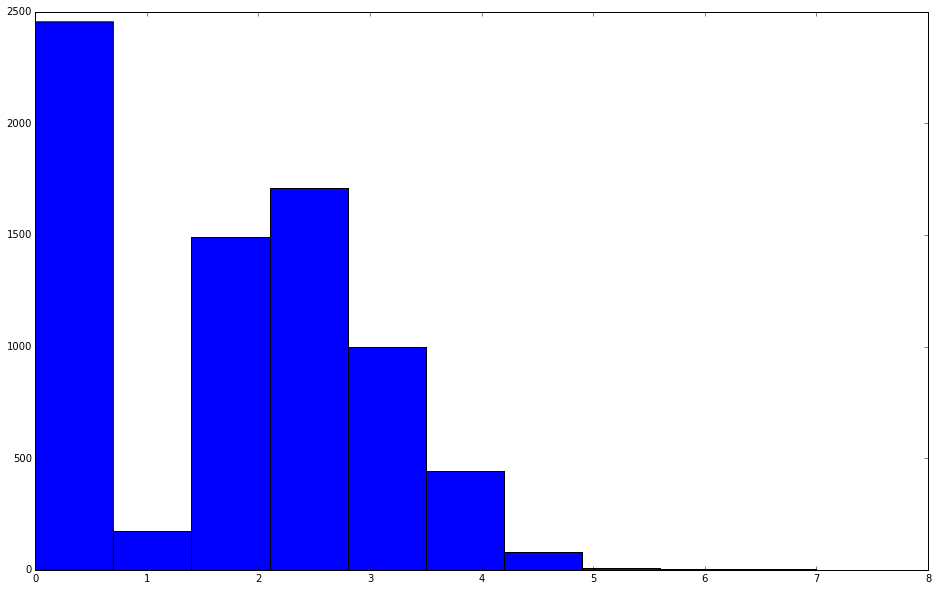

In [51]:
plt.hist(z);

# Age/gender

In [55]:
ag = get_db('usc_age_gender')
ag = ag.merge(sf, left_on='id2', right_on='geoid')

ag = ag[ag.lon > -122.5185]
ag = ag[ag.lon < -122.35454]
print ag.shape
ag.head()

(7372, 64)


,block_x,block_group,tract_x,id2,total,m,m_u5,m_5_9,m_10_14,m_15_17,...,county,tract_y,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,075,010100,1000,60750101001000,Block 1000,G5040,0,646925,37.809475,-122.409779
1,101,1,1001,60750101001001,44,31,0,0,1,0,...,075,010100,1001,60750101001001,Block 1001,G5040,243533,0,37.808522,-122.409559
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,075,010100,1002,60750101001002,Block 1002,G5040,3062,0,37.806984,-122.406458
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,075,010100,1003,60750101001003,Block 1003,G5040,1323,0,37.807758,-122.408149
4,101,1,1004,60750101001004,1,0,0,0,0,0,...,075,010100,1004,60750101001004,Block 1004,G5040,15453,0,37.808645,-122.414515


In [63]:
ag.columns[ag.columns.str.match('[m_*]')]

Index([u'm', u'm_u5', u'm_5_9', u'm_10_14', u'm_15_17', u'm_18_19', u'm_20',
       u'm_21', u'm_22_24', u'm_25_29', u'm_30_34', u'm_35_39', u'm_40_44',
       u'm_45_49', u'm_50_54', u'm_55_59', u'm_60_61', u'm_62_64', u'm_65_66',
       u'm_67_69', u'm_70_74', u'm_75_79', u'm_80_84', u'm_85_over', u'mtfcc'],
      dtype='object')

In [67]:
ag['Fscale'] = 2 * ag.f / (ag.total) - 1
ag['Fscale'].fillna(0, inplace=True)

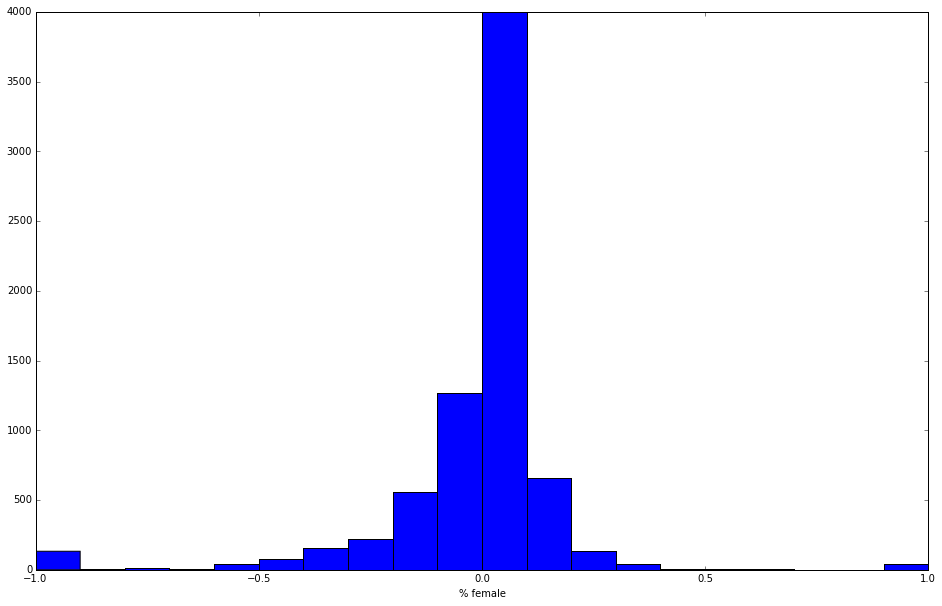

In [71]:
plt.hist(ag.Fscale, bins=20)
plt.xlabel('% female')

In [74]:
x = ag.lon
y = ag.lat
z = ag.Fscale
xi, yi, zi = make_bins(x, y, z)

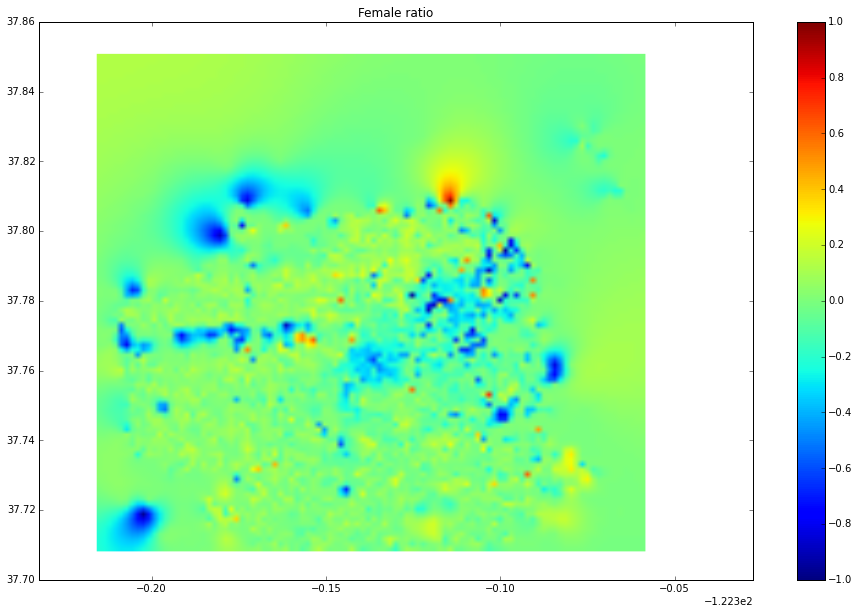

In [82]:
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.scatter(x, y, c=z)
# plt.clim(0, 5)
plt.axis('equal')
plt.colorbar()
plt.title('Female ratio')
plt.show()

# assessment

In [5]:
asdf = get_db('assessment')
print asdf.shape
asdf.head()

(204541, 10)


,situs_address,situs_zip,apn,re,re_improvements,pp_value,district,taxable_value,lat,lon
0,NaN,94102.0,0001001,0,0,0,General Property,0,37.808666,-122.421559
1,NaN,94102.0,0002001,0,0,0,General Property,0,37.808730,-122.420499
2,NaN,94102.0,0004002,0,0,0,General Property,0,37.808508,-122.415083
3,NaN,94102.0,0005001,0,0,0,General Property,0,37.808415,-122.416682
4,NaN,94102.0,0006001,0,0,0,General Property,0,37.808322,-122.418349


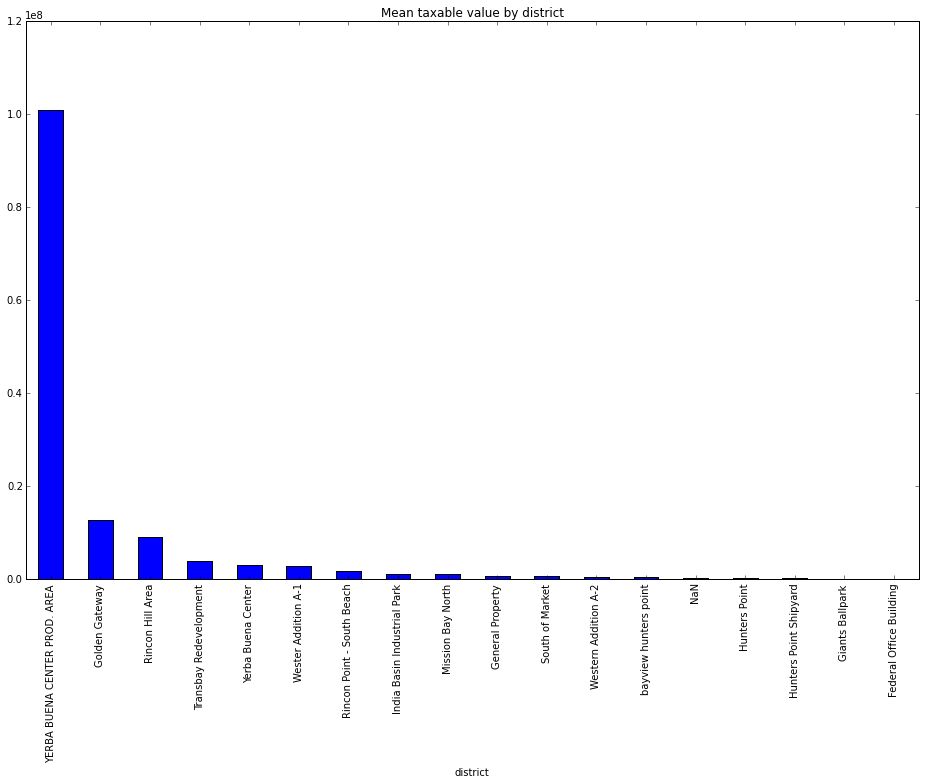

In [6]:
asdf.groupby('district').mean()['taxable_value'].sort_values(ascending=False).plot(kind='bar')
plt.title('Mean taxable value by district');

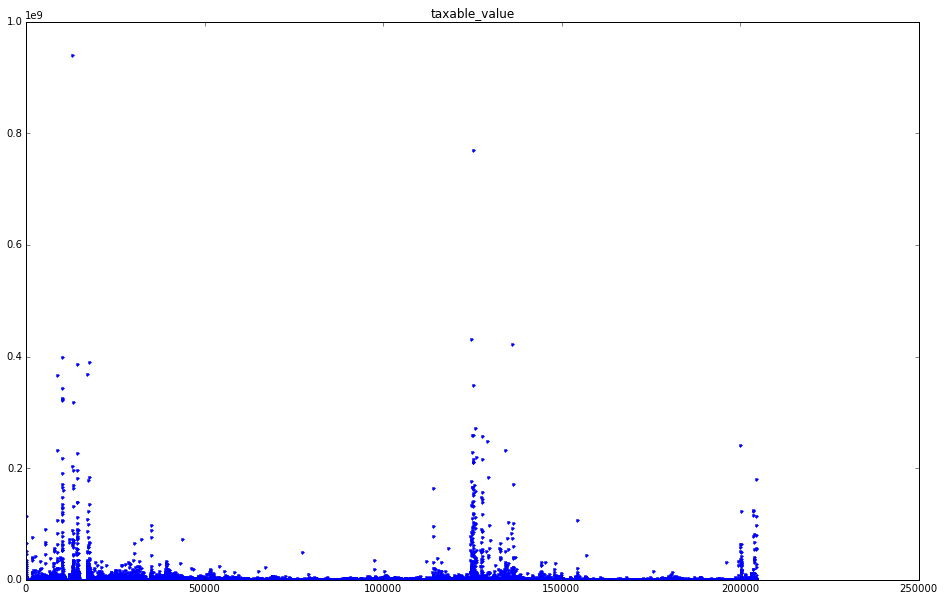

In [8]:
plt.plot(asdf.taxable_value, '.')
plt.title('taxable_value');

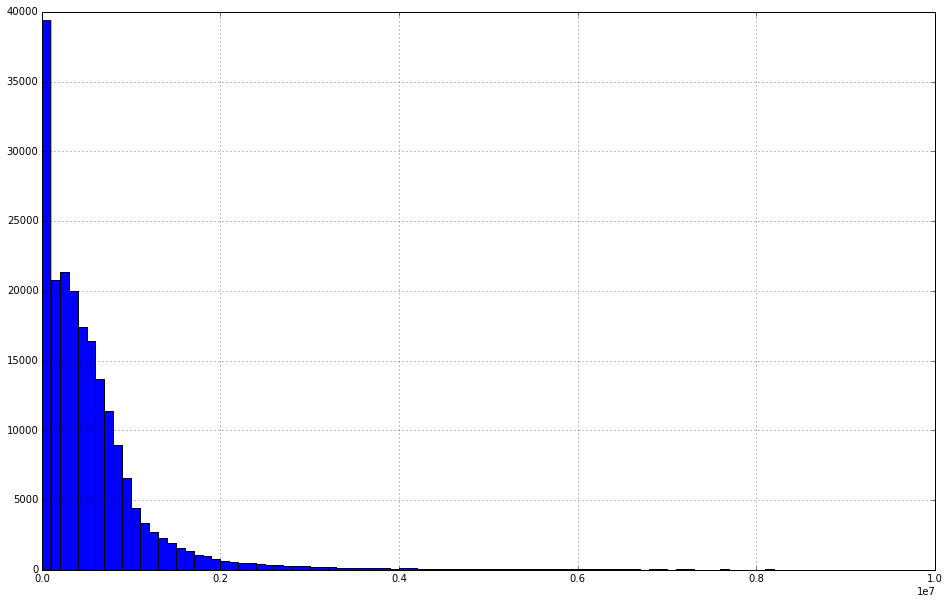

In [9]:
asdf.taxable_value[asdf.taxable_value < 10e6].hist(bins=100)

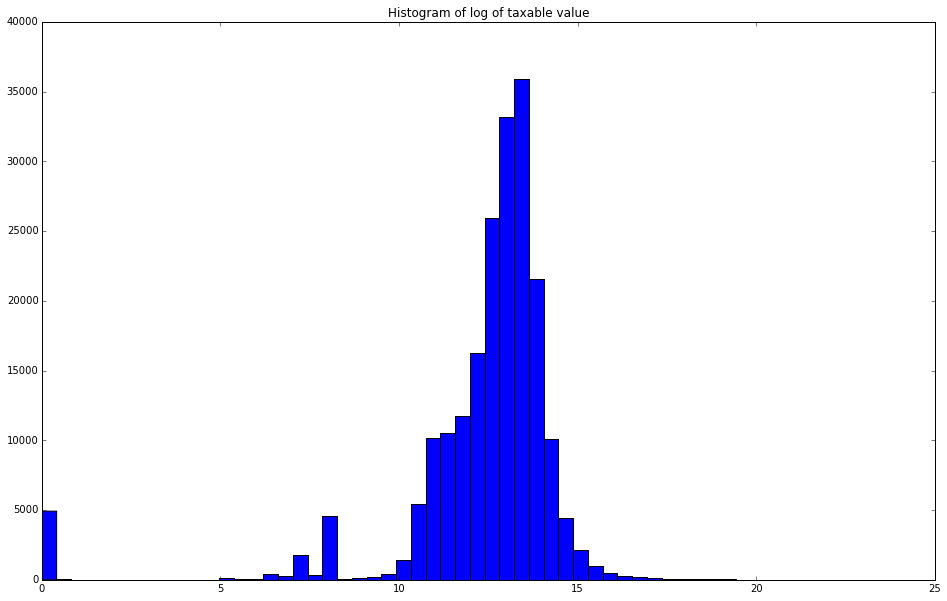

In [10]:
plt.hist(np.log(asdf.taxable_value+1), bins=50)
plt.title('Histogram of log of taxable value');

In [11]:
max(asdf.taxable_value)

941009633.0

In [12]:
asdf[asdf.taxable_value == max(asdf.taxable_value)]

,situs_address,situs_zip,apn,re,re_improvements,pp_value,district,taxable_value,lat,lon
12991,555 CALIFORNIA ST,941041502.0,0259026,277907376,663102257,0,General Property,941009633,37.792262,-122.403486


In [13]:
# Transamerica
asdf[asdf.situs_address.str.match('600 MONTGOMERY')]

,situs_address,situs_zip,apn,re,re_improvements,pp_value,district,taxable_value,lat,lon
8795,600 MONTGOMERY ST,941112702.0,0207032,56166220,176611567,0,General Property,232777787,37.795159,-122.402715


In [14]:
# Transamerica
asdf[asdf.situs_address.str.match('730 STOCKTON')]

,situs_address,situs_zip,apn,re,re_improvements,pp_value,district,taxable_value,lat,lon
10157,730 STOCKTON ST,941082317.0,0242016,717725,1171805,2542,General Property,1892072,37.792703,-122.407391


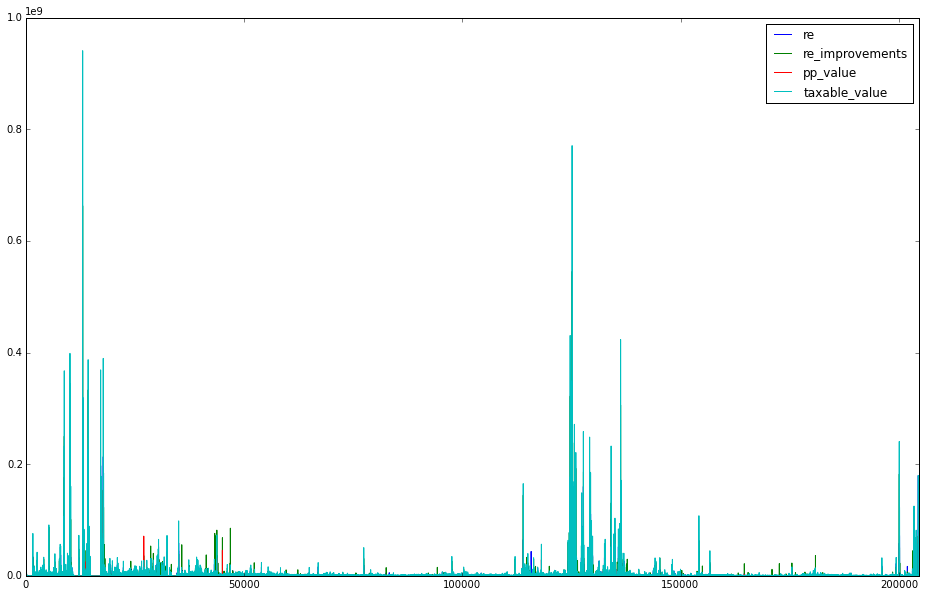

In [92]:
asdf.drop(['lat', 'lon'], axis=1).plot()

In [15]:
asdf = asdf[['lat', 'lon', 'taxable_value']]

In [16]:
asdf.head()

,lat,lon,taxable_value
0,37.808666,-122.421559,0
1,37.808730,-122.420499,0
2,37.808508,-122.415083,0
3,37.808415,-122.416682,0
4,37.808322,-122.418349,0


In [17]:
x = asdf.lon
y = asdf.lat
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)

In [23]:
asdf['lon_cut'] = pd.cut(asdf.lon, xi, labels=xi[1:])
asdf['lat_cut'] = pd.cut(asdf.lat, yi, labels=yi[1:])
asdf.head()

,lat,lon,taxable_value,lon_cut,lat_cut
0,37.808666,-122.421559,0,-122.420396,37.808801
1,37.808730,-122.420499,0,-122.420396,37.808801
2,37.808508,-122.415083,0,-122.414341,37.808801
3,37.808415,-122.416682,0,-122.415855,37.808801
4,37.808322,-122.418349,0,-122.417369,37.808801


In [34]:
asdfcut = asdf.groupby(['lon_cut', 'lat_cut']).mean().dropna().reset_index()
asdfcut.head()

,lon_cut,lat_cut,lat,lon,taxable_value
0,-122.512746,37.780691,37.780188,-122.513394,0.000000
1,-122.511232,37.778349,37.777992,-122.511305,0.000000
2,-122.511232,37.779520,37.779388,-122.512648,0.000000
3,-122.511232,37.783034,37.782698,-122.512206,0.000000
4,-122.509718,37.772493,37.771975,-122.510345,384895.981818


In [45]:
x = asdfcut.lon
y = asdfcut.lat
z = np.log(asdfcut.taxable_value + 1)
xi, yi, zi = make_bins(x, y, z)

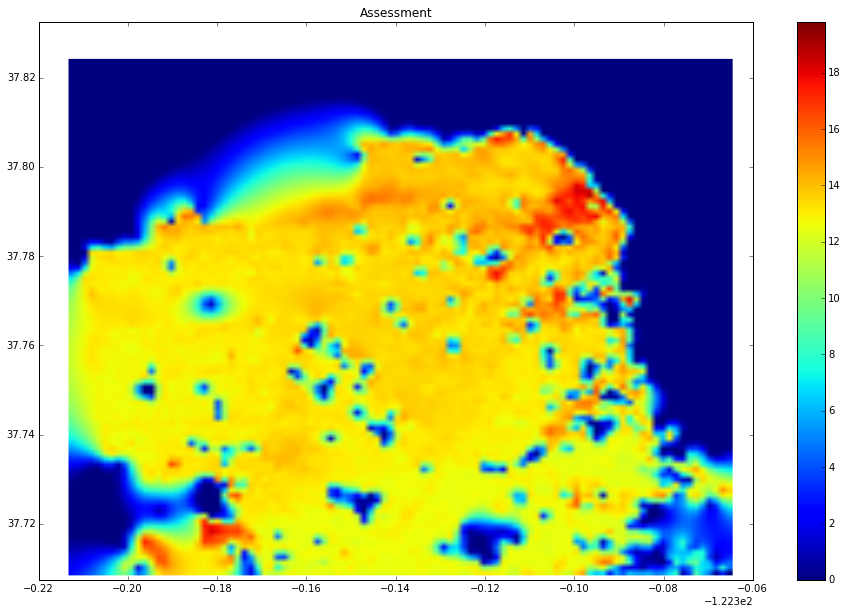

In [50]:
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.scatter(x, y, c=z)
#plt.clim(0, 5e6)
plt.axis('equal')
plt.colorbar()
plt.title('Assessment')
plt.show()

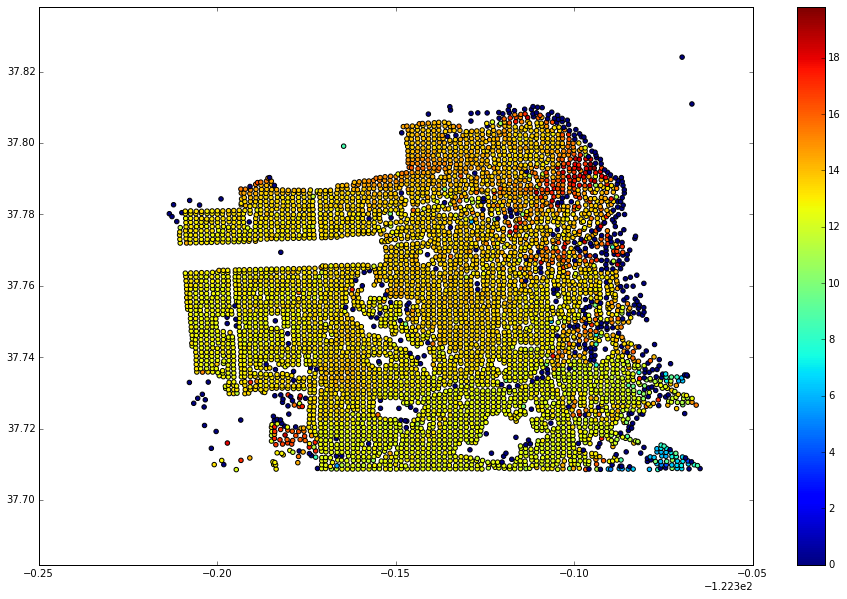

In [52]:
plt.scatter(x, y, c=z)
plt.axis('equal')
plt.colorbar();

# Crime

In [76]:
cdat = get_db('sfpd')
cdat.head()

,category,descript,pddistrict,address,lon,lat,datetime
0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",TARAVAL,19TH AV / HOLLOWAY AV,-122.475222,37.721057,2015-10-18 23:54:00
1,BURGLARY,"BURGLARY, HOT PROWL, FORCIBLE ENTRY",CENTRAL,700 Block of BAY ST,-122.419359,37.804838,2015-10-18 23:37:00
2,OTHER OFFENSES,TRAFFIC VIOLATION,INGLESIDE,PERSIA AV / DUBLIN ST,-122.426390,37.718561,2015-10-18 23:34:00
3,ASSAULT,THREATS AGAINST LIFE,TENDERLOIN,200 Block of LEAVENWORTH ST,-122.414218,37.783259,2015-10-18 23:30:00
4,ROBBERY,"ROBBERY, BODILY FORCE",SOUTHERN,1000 Block of MARKET ST,-122.411340,37.781271,2015-10-18 23:30:00


In [77]:
cdat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830772 entries, 0 to 1830771
Data columns (total 7 columns):
category      object
descript      object
pddistrict    object
address       object
lon           float64
lat           float64
datetime      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 111.7+ MB


In [78]:
cdat = cdat[['lat', 'lon', 'category']]
cdat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830772 entries, 0 to 1830771
Data columns (total 3 columns):
lat         float64
lon         float64
category    object
dtypes: float64(2), object(1)
memory usage: 55.9+ MB


In [75]:
latmin = 37.70784
latmax = 37.8195
lonmin = -122.5185
lonmax = -122.35454

In [79]:
cdat = cdat[cdat.lat > latmin]
cdat = cdat[cdat.lat < latmax]
cdat = cdat[cdat.lon > lonmin]
cdat = cdat[cdat.lon < lonmax]
cdat.shape

(1830503, 3)

In [80]:
x = cdat.lon
y = cdat.lat
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
cdat['lon_cut'] = pd.cut(cdat.lon, xi, labels=xi[1:])
cdat['lat_cut'] = pd.cut(cdat.lat, yi, labels=yi[1:])
cdat.head()

,lat,lon,category,lon_cut,lat_cut
0,37.721057,-122.475222,OTHER OFFENSES,-122.474588,37.721144
1,37.804838,-122.419359,BURGLARY,-122.419012,37.805155
2,37.718561,-122.426390,OTHER OFFENSES,-122.425020,37.718933
3,37.783259,-122.414218,ASSAULT,-122.413004,37.784152
4,37.781271,-122.411340,ROBBERY,-122.409999,37.781941


In [84]:
cdatcut = cdat.groupby(['lon_cut', 'lat_cut']).count().dropna().reset_index()
print cdatcut.shape
cdatcut.head()

(5718, 5)


,lon_cut,lat_cut,lat,lon,category
0,-122.512140,37.777520,48,48,48
1,-122.512140,37.778625,814,814,814
2,-122.510638,37.770887,161,161,161
3,-122.510638,37.771993,181,181,181
4,-122.510638,37.773098,46,46,46


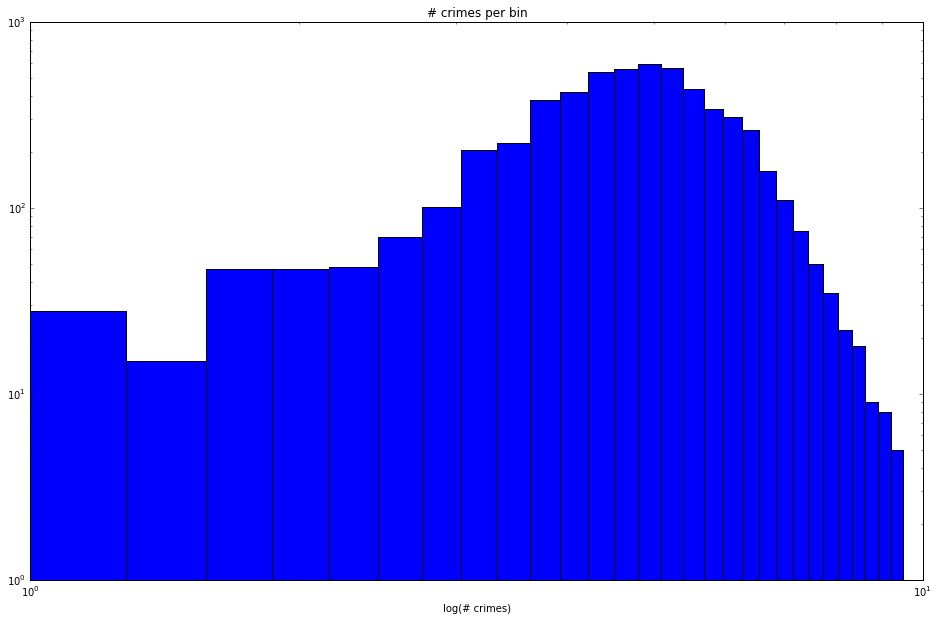

In [107]:
fig, ax = plt.subplots()
plt.hist(np.log(cdatcut.category[cdatcut.category < 20000] + 1), bins=30)
# cdatcut.category[cdatcut.category < 20000].hist(bins=100)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(1,10)
plt.title('# crimes per bin')
plt.xlabel('log(# crimes)');

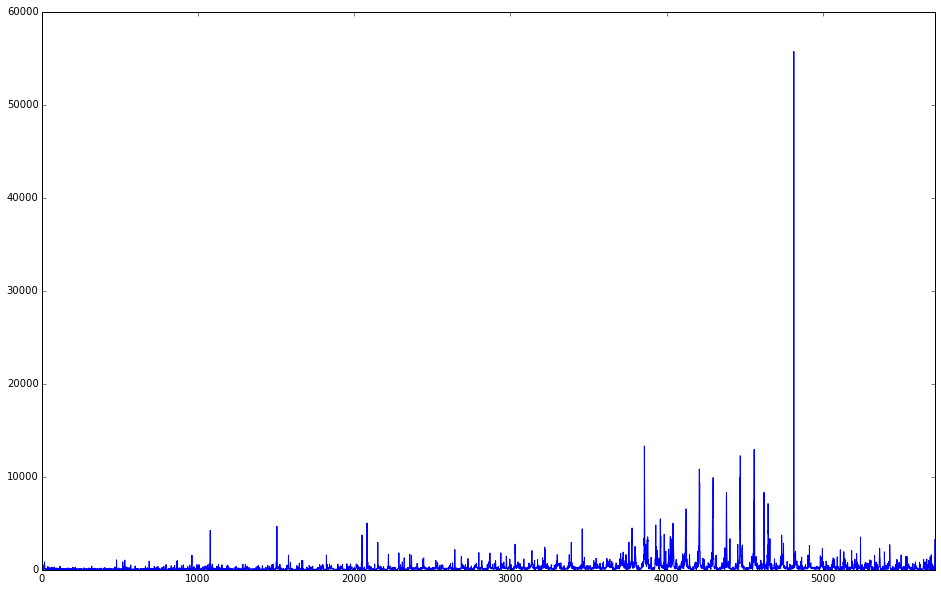

In [88]:
cdatcut.category.plot()

In [117]:
x = cdatcut.lon_cut
y = cdatcut.lat_cut
z = cdatcut.category

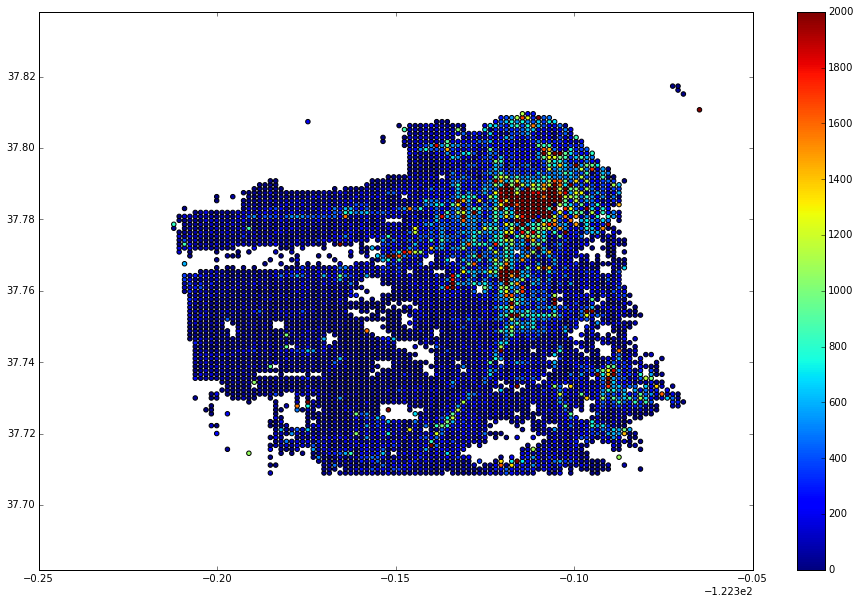

In [123]:
plt.scatter(x, y, c=z)
plt.colorbar()
plt.clim(0,2000)
plt.axis('equal');

In [124]:
xi, yi, zi = make_bins(x, y, z)

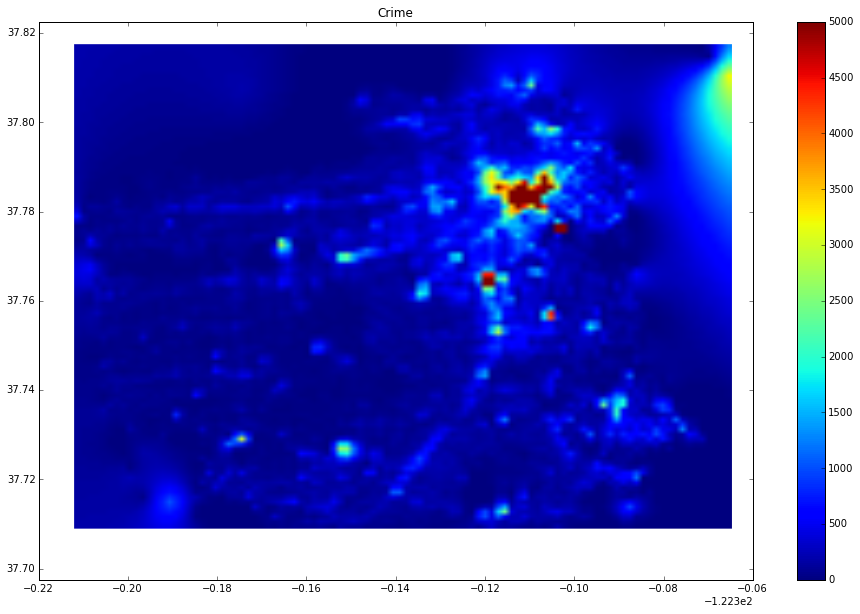

In [129]:
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.scatter(x, y, c=z)
plt.clim(0, 5000)
plt.axis('equal')
plt.colorbar()
plt.title('Crime')
plt.show()

In [132]:
x = cdatcut.lon_cut
y = cdatcut.lat_cut
z = np.log(cdatcut.category + 1)
xi, yi, zi = make_bins(x, y, z)

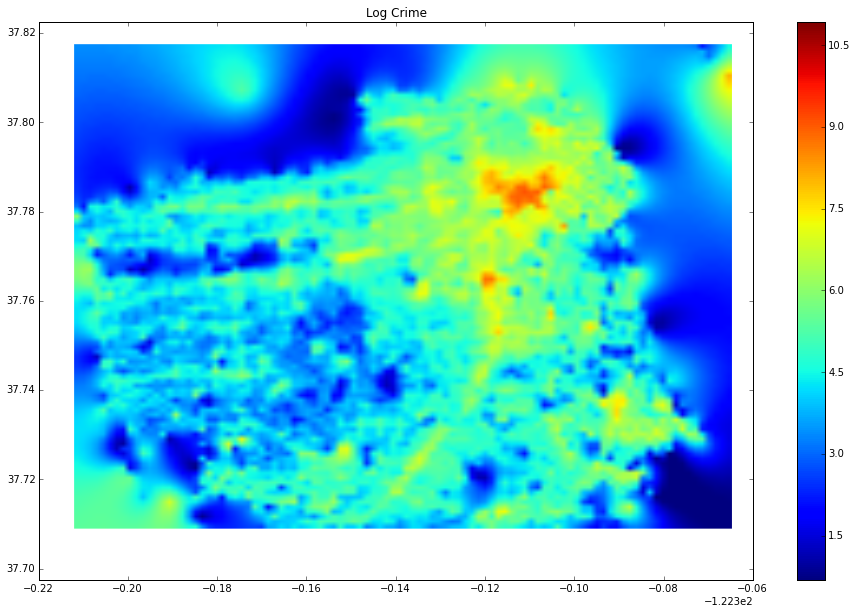

In [134]:
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.scatter(x, y, c=z)
# plt.clim(0, 5000)
plt.axis('equal')
plt.colorbar()
plt.title('Log Crime')
plt.show()

# Business

In [142]:
from code.featurize import *

In [136]:
bus = get_db('business')
print bus.shape
bus.head()

(124417, 10)


,ownership_name,dba_name,street_address,city,state,zip_code,major_class,minor_class,lat,lon
0,EASTMAN KODAK CO,EASTMAN KODAK CO,343 STATE ST,ROCHESTER,NY,14650,"clothing, furniture, auto, insurance",0,43.161198,-77.619282
1,FERRANDO LOUISE,3101 LAGUNA APTS,3101 LAGUNA ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.799779,-122.430988
2,IDEAL NOVAK CORP,IDEAL NOVAK CORP,8 MENDOSA AVE,San Francisco,CA,94116,hotel,0,37.748921,-122.465050
3,TOURNAHU GEORGE L,TOURNAHU ARMS,1842 JEFFERSON ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.804734,-122.442997
4,TOURNAHU GEORGE L,3301 BRODERICK APARTMENTS,3301 BRODERICK ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.800835,-122.444748


In [143]:
bus = cut_df(bus)
print bus.shape
bus.head()

(105807, 12)


,ownership_name,dba_name,street_address,city,state,zip_code,major_class,minor_class,lat,lon,lon_cut,lat_cut
1,FERRANDO LOUISE,3101 LAGUNA APTS,3101 LAGUNA ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.799779,-122.430988,-122.430723,37.800326
2,IDEAL NOVAK CORP,IDEAL NOVAK CORP,8 MENDOSA AVE,San Francisco,CA,94116,hotel,0,37.748921,-122.465050,-122.463847,37.749572
3,TOURNAHU GEORGE L,TOURNAHU ARMS,1842 JEFFERSON ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.804734,-122.442997,-122.442317,37.804838
4,TOURNAHU GEORGE L,3301 BRODERICK APARTMENTS,3301 BRODERICK ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.800835,-122.444748,-122.443973,37.801454
5,TOURNAHU GEORGE L,3301 BRODERICK APARTMENTS,3301 BRODERICK ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.800835,-122.444748,-122.443973,37.801454


In [144]:
print len(bus.major_class.unique())

18


In [188]:
bus[(bus.lon_cut == bus.lon_cut.iloc[0]) & (bus.lat_cut == bus.lat_cut.iloc[0])]

,ownership_name,dba_name,street_address,city,state,zip_code,major_class,minor_class,lat,lon,lon_cut,lat_cut
1,FERRANDO LOUISE,3101 LAGUNA APTS,3101 LAGUNA ST,San Francisco,CA,94123,"mining, entertainment, medical",0,37.799779,-122.430988,-122.430723,37.800326
2476,LEE WAY SOON,3125 LAGUNA APTS,3125 LAGUNA ST,San Francisco,CA,94123,hotel,0,37.800017,-122.431036,-122.430723,37.800326
2479,NG FRANK,3110-3114 LAGUNA ST APTS,3110 LAGUNA,San Francisco,CA,94123,"mining, entertainment, medical",0,37.799703,-122.430972,-122.430723,37.800326
4639,YEE DAMONE & ANGIE,1907 GREENWICH APTS,1907 GREENWICH ST,San Francisco,CA,94123,"clothing, furniture, auto, insurance",0,37.799517,-122.431401,-122.430723,37.800326
12005,DAVILA ANIBAL A,1956 GREENWICH ST APTS,1956 GREENWICH ST,San Francisco,CA,94123,hotel,0,37.799455,-122.431886,-122.430723,37.800326
16373,EDJ HOLDING CO & JONES FIN CO,EDWARD JONES,1875 LOMBARD ST A,San Francisco,CA,94123,"agent, broker",0,37.800263,-122.432358,-122.430723,37.800326
21111,LI PI PAUL/LIN JENNY YUE HE,HAI SUN RESTAURANT,3137 LAGUNA ST,San Francisco,CA,94123,"clothing, furniture, auto, insurance",0,37.799956,-122.431023,-122.430723,37.800326
38999,HURLEY JOSEPH M,CENTURY PROPERTIES,1919 GREENWICH ST,San Francisco,CA,94132,"mining, entertainment, medical",0,37.799536,-122.431250,-122.430723,37.800326
41393,ABBOTT BRUNO/IOSEBASHVILI TEAH,ABBOTT GROUP THE,3125 LAGUNA ST 1,San Francisco,CA,94123,"mining, entertainment, medical",0,37.800017,-122.431036,-122.430723,37.800326
42064,GOREN LEORA M,GOREN ARCHITECTURE & DESIGN,1973 GREENWICH ST,San Francisco,CA,94123,arcitectural,0,37.799430,-122.432083,-122.430723,37.800326


In [189]:
buscut = bus.groupby(['lat_cut', 'lon_cut', 'major_class']).count().dropna().reset_index()
buscut.drop(['dba_name', 'street_address', 'city','state','zip_code',
             'minor_class','lat','lon'], axis=1, inplace=True)

buscut = buscut.sort_values(['lat_cut', 'lon_cut'], ascending=False)

print buscut.shape
buscut[(buscut.lon_cut == bus.lon_cut.iloc[0]) & (buscut.lat_cut == bus.lat_cut.iloc[0])]

(20923, 4)


,lat_cut,lon_cut,major_class,ownership_name
19914,37.800326,-122.430723,"agent, broker",3
19915,37.800326,-122.430723,arcitectural,1
19916,37.800326,-122.430723,"clothing, furniture, auto, insurance",2
19917,37.800326,-122.430723,hotel,4
19918,37.800326,-122.430723,laundry,1
19919,37.800326,-122.430723,"mining, entertainment, medical",7
19920,37.800326,-122.430723,n.a.,2


In [199]:
buscutpiv = buscut.pivot(columns='major_class', values='ownership_name').fillna(0)

print buscutpiv.shape

busfull = buscut.merge(buscutpiv, left_index=True, right_index=True)
busfull.drop(['major_class', 'ownership_name'], axis=1, inplace=True)
print busfull.shape
busfull = busfull.groupby(['lat_cut', 'lon_cut']).sum().reset_index()
print busfull.shape
# busfull[(busfull.lon_cut == bus.lon_cut.iloc[0]) & (busfull.lat_cut == bus.lat_cut.iloc[0])].groupby(['lat_cut', 'lon_cut']).sum()
busfull.head()

(20923, 18)
(20923, 20)
(4967, 20)


,lat_cut,lon_cut,NaN,"agent, broker",arcitectural,"clothing, furniture, auto, insurance",construction,credit,equipment rental,fixed place of business,garage,hotel,industrial supply,laundry,"mining, entertainment, medical",n.a.,taxi,trucking,utility,warehouse
0,37.708968,-122.487033,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
1,37.708968,-122.483721,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,37.708968,-122.482064,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,37.708968,-122.470471,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37.708968,-122.468815,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
